# Исследование успешности игр

Интернет-магазине "Стримчик" продает по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats as st
pd.set_option('display.float_format', '{:,.2f}'.format) 

In [2]:
data = pd.read_csv('/datasets/games.csv', sep=',')
display(data.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,nan,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,nan,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


**Вывод**
1. У нас есть таблица с данными о компьютерных играх, в ней 11 колонок: 

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

2. В 4 колонках данных меньше, чем в остальных 7. Вероятно, в колонках Year_of_Release, Critic_Score, User_Score и Rating есть пропуски данных

3. Названия колонок, а также строки в столбцах Name, Platform и Genre содержат строчные и прописные буквы. Их нужно будет привести к нижнему регистру.

4. В Year_of_Release - год выпуска - странные цифры типа 2,006.00 - надо разобраться, что они означают
5. На первый взгляд, тип данных нужно менять только у столбца Year_of_Release - год выпуска - сейчас это float64

## Предобработка данных

### Замена названий столбцов

In [5]:
#переименуем столбцы и проверим результат
data = data.rename(columns=
                   {'Name':'name', 
                    'Platform':'platform', 
                    'Year_of_Release':'year_of_release',
                    'Genre':'genre', 
                    'NA_sales':'na_sales', 
                    'EU_sales':'eu_sales',
                    'JP_sales':'jp_sales', 
                    'Other_sales':'other_sales',
                    'Critic_Score':'critic_score', 
                    'User_Score':'user_score', 
                    'Rating':'rating'})
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN


In [6]:
#удаляем верхний регистр в столбе с названием, названием платформы и жанром
data['name'] = data['name'].str.lower() 
data['platform'] = data['platform'].str.lower() 
data['genre'] = data['genre'].str.lower() 
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,"2,006.00",sports,41.36,28.96,3.77,8.45,76.00,8,E
1,super mario bros.,nes,"1,985.00",platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,mario kart wii,wii,"2,008.00",racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,wii sports resort,wii,"2,009.00",sports,15.61,10.93,3.28,2.95,80.00,8,E
4,pokemon red/pokemon blue,gb,"1,996.00",role-playing,11.27,8.89,10.22,1.00,nan,NaN,NaN


In [7]:
#проверяем на дубликаты 
data.duplicated().sum()

0

### Замена типов данных

In [8]:
# заменим тип данных в дате выхода игр 
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')
data['year'] = data['year_of_release'].dt.year
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
0,wii sports,wii,2006-01-01,sports,41.36,28.96,3.77,8.45,76.00,8,E,"2,006.00"
1,super mario bros.,nes,1985-01-01,platform,29.08,3.58,6.81,0.77,nan,NaN,NaN,"1,985.00"
2,mario kart wii,wii,2008-01-01,racing,15.68,12.76,3.79,3.29,82.00,8.3,E,"2,008.00"
3,wii sports resort,wii,2009-01-01,sports,15.61,10.93,3.28,2.95,80.00,8,E,"2,009.00"
4,pokemon red/pokemon blue,gb,1996-01-01,role-playing,11.27,8.89,10.22,1.00,nan,NaN,NaN,"1,996.00"


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null datetime64[ns]
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
year               16446 non-null float64
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 1.5+ MB


### Обработка пропусков 

In [10]:
#посчитаем пропуски
data.isna().sum() 

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
year                269
dtype: int64

In [11]:
# пропуски названия игры, жанра и даты выхода мы не можем заполнить какими-либо значениями, поэтому удалим их

data.dropna(subset=['name'], inplace=True)
data.dropna(subset=['genre'], inplace=True)
data.dropna(subset=['year_of_release'], inplace=True)

data.isna().sum() #проверим удаление строк

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
year                  0
dtype: int64

In [12]:
# посмотрим на значения столбца critic_score - оценка критиков (максимум 100)
data['critic_score'].unique()
#уникальных значений достаточно много, оставим пропуски без заполнения,
# так как любое заполнение исказит результаты корреляционного анализа и стат-тестов.

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [13]:
# посмотрим на значения столбца user_score - оценка пользователей (максимум 10)
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [14]:
data['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.9       2
0.5       2
0.3       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [15]:
# заменим неопределенное значение tbd
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')

In [16]:
#заменим тип данных столбца с оценкой пользователей
data['user_score'] = data['user_score'].astype('float')
 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null datetime64[ns]
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
year               16444 non-null float64
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 1.6+ MB


In [17]:
# посмотрим на значения столбца rating - возрастная категория
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [18]:
#так как тип данных у столбца - объект - заменим пропущенные значения на unknown 
data['rating'] = data['rating'].fillna('unknown') 

In [19]:
#пропуски отсаются в двух столбцах, которые важно оставить без изменений для расчета статистических данных
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
year                  0
dtype: int64

### Cуммарные продажи во всех регионах 

In [20]:
#посчитаем общие продажи во всех регионах мира для каждой игры 
data['union_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,union_sales
0,wii sports,wii,2006-01-01,sports,41.36,28.96,3.77,8.45,76.00,8.00,E,"2,006.00",82.54
1,super mario bros.,nes,1985-01-01,platform,29.08,3.58,6.81,0.77,nan,nan,unknown,"1,985.00",40.24
2,mario kart wii,wii,2008-01-01,racing,15.68,12.76,3.79,3.29,82.00,8.30,E,"2,008.00",35.52
3,wii sports resort,wii,2009-01-01,sports,15.61,10.93,3.28,2.95,80.00,8.00,E,"2,009.00",32.77
4,pokemon red/pokemon blue,gb,1996-01-01,role-playing,11.27,8.89,10.22,1.00,nan,nan,unknown,"1,996.00",31.38


## Анализ данных

### Сколько игр выпускалось в разные годы

In [21]:
# посчитаем, сколько игр выпускалось ежегодно
data_year_game = data.groupby('year').agg({'name':'count'}).reset_index()
data_year_game = data_year_game.rename(columns={'year':'year_game', 'name':'count_game'})
display(data_year_game.head(10))

,year_game,count_game
0,"1,980.00",9
1,"1,981.00",46
2,"1,982.00",36
3,"1,983.00",17
4,"1,984.00",14
5,"1,985.00",14
6,"1,986.00",21
7,"1,987.00",16
8,"1,988.00",15
9,"1,989.00",17


In [22]:
# мы имеем статистику за последние 37 лет
data_year_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
year_game     37 non-null float64
count_game    37 non-null int64
dtypes: float64(1), int64(1)
memory usage: 720.0 bytes


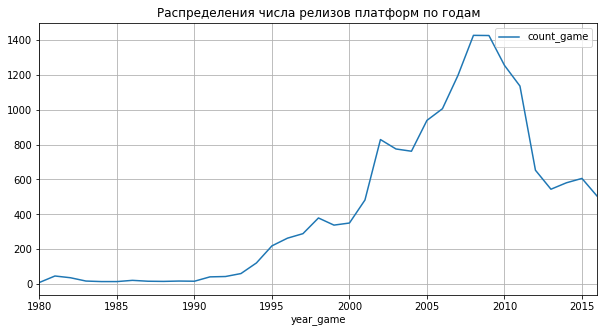

In [23]:
# построим график числа релизов платформ по годам
data_year_game.plot(x='year_game', y='count_game', kind='line', figsize = (10,5), title='Распределения числа релизов платформ по годам')
plt.grid(True)

**Вывод**

Резкий рост числа выпущенных игр начался в 1990-м году и достиг максимума в 2008-2009 годах. Затем наблюдается резкое падение числа игр - примерно за пять лет (до 2013 года) их количество сократилось более чем в 2 раза. 

### Анализ игровых платформ

In [24]:
# посмотрим, как менялись продажи по платформам 
data_platform = data.groupby(['platform', 'year']).agg({'union_sales':'sum'}).reset_index()
display(data_platform.head(10))

,platform,year,union_sales
0,2600,"1,980.00",11.38
1,2600,"1,981.00",35.68
2,2600,"1,982.00",28.88
3,2600,"1,983.00",5.84
4,2600,"1,984.00",0.27
5,2600,"1,985.00",0.45
6,2600,"1,986.00",0.67
7,2600,"1,987.00",1.94
8,2600,"1,988.00",0.74
9,2600,"1,989.00",0.63


In [25]:
#получим top_10 платформ с наибольшим числом продаж
top_10 = data.groupby('platform').agg({'union_sales': 'sum'}).sort_values(by='union_sales').tail(10).index

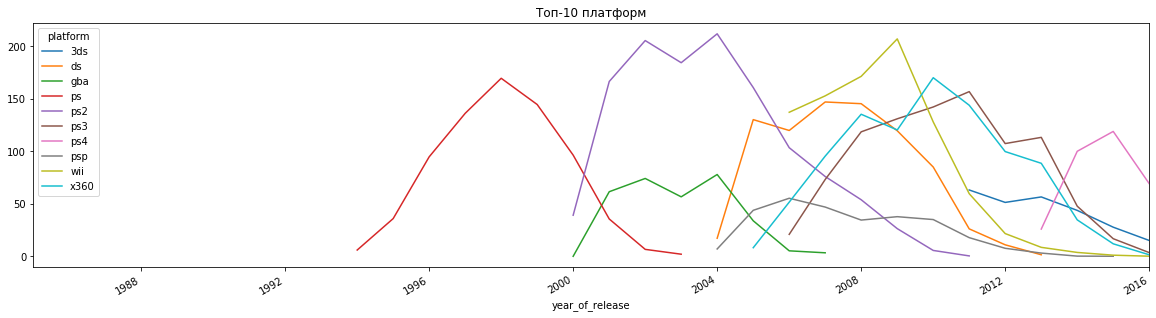

In [26]:
#построим график распределение продаж платформ по годам
data.query('platform in @top_10').pivot_table(index = 'year_of_release', columns = 'platform', values = 'union_sales', aggfunc = 'sum' ).plot(title='Топ-10 платформ', figsize = (20,5))

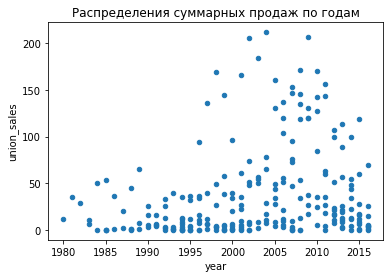

In [27]:
# построим график распределения суммарных продаж по годам
data_platform.plot(x='year', y='union_sales', kind='scatter', title='Распределения суммарных продаж по годам')

In [28]:
#расчитаем период жизни платформ
actual_period = data.groupby(['platform','year_of_release']).agg({'union_sales': 'sum'}).query('platform in @ top_10 and union_sales > 1')
# расчитает жизненный период каждой платформы
actual_period = actual_period.reset_index().groupby('platform').agg({'year_of_release': 'count'}) 
# расчитает сколько в среднем живет платформа
actual_period.mean() 

year_of_release   9.10
dtype: float64

**Вывод**

Пик суммарных продаж приходится на 2001-2010 годы - тогда же, как мы выяснили ранее, было и наибольшее число выпускаемых компьютерных игр. У самых популярных платформ (как показано на графике) есть один или два пика суммарных продаж, после чего идет спад и закрытие платформы. Выяснилось, что весь этот жизненный цикл платформы проходят примерно за 9 лет. 

Также мы выяснили по графикам, что тенденция по выпуску игр, а также по сумме продаж меняется примерно в 2011-2012-х годах: выпускаемых игр становится меньше, ряд ведущих платформ в это время закончили свое существование, соответственно, и объем выручки в это время падает. Так как нам нужно спрогнозировать данные на 2017-й год логично выбрать требуемый "актуальный период" в 5 лет, с 2012 года.

### Актуальный период

In [29]:
#здадим актуальный период в пять лет, с 2012 года
data_actual = data[data['year'] > 2011].reset_index(drop=True)
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,union_sales
0,grand theft auto v,ps3,2013-01-01,action,7.02,9.09,0.98,3.96,97.00,8.20,M,"2,013.00",21.05
1,grand theft auto v,x360,2013-01-01,action,9.66,5.14,0.06,1.41,97.00,8.10,M,"2,013.00",16.27
2,call of duty: black ops 3,ps4,2015-01-01,shooter,6.03,5.86,0.36,2.38,nan,nan,unknown,"2,015.00",14.63
3,pokemon x/pokemon y,3ds,2013-01-01,role-playing,5.28,4.19,4.35,0.78,nan,nan,unknown,"2,013.00",14.60
4,call of duty: black ops ii,ps3,2012-01-01,shooter,4.99,5.73,0.65,2.42,83.00,5.30,M,"2,012.00",13.79


In [30]:
data_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2886 entries, 0 to 2885
Data columns (total 13 columns):
name               2886 non-null object
platform           2886 non-null object
year_of_release    2886 non-null datetime64[ns]
genre              2886 non-null object
na_sales           2886 non-null float64
eu_sales           2886 non-null float64
jp_sales           2886 non-null float64
other_sales        2886 non-null float64
critic_score       1312 non-null float64
user_score         1531 non-null float64
rating             2886 non-null object
year               2886 non-null float64
union_sales        2886 non-null float64
dtypes: datetime64[ns](1), float64(8), object(4)
memory usage: 293.2+ KB


### Продажи игровых платформ

In [31]:
#Нужно выберать несколько потенциально прибыльных платформ
data_actual.describe()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,year,union_sales
count,"2,886.00","2,886.00","2,886.00","2,886.00","1,312.00","1,531.00","2,886.00","2,886.00"
mean,0.20,0.18,0.07,0.05,72.26,6.64,"2,013.92",0.50
std,0.57,0.51,0.24,0.16,12.69,1.57,1.41,1.25
min,0.00,0.00,0.00,0.00,13.00,0.20,"2,012.00",0.01
25%,0.00,0.00,0.00,0.00,66.00,5.80,"2,013.00",0.04
50%,0.03,0.03,0.01,0.01,74.00,7.00,"2,014.00",0.12
75%,0.17,0.14,0.05,0.04,81.00,7.80,"2,015.00",0.43
max,9.66,9.09,4.39,3.96,97.00,9.30,"2,016.00",21.05


In [32]:
#получим top_10 платформ из актуальных данных с наибольшим числом продаж
top_pl = data_actual.groupby('platform').agg({'union_sales': 'sum'}).sort_values(by='union_sales').tail(10).index

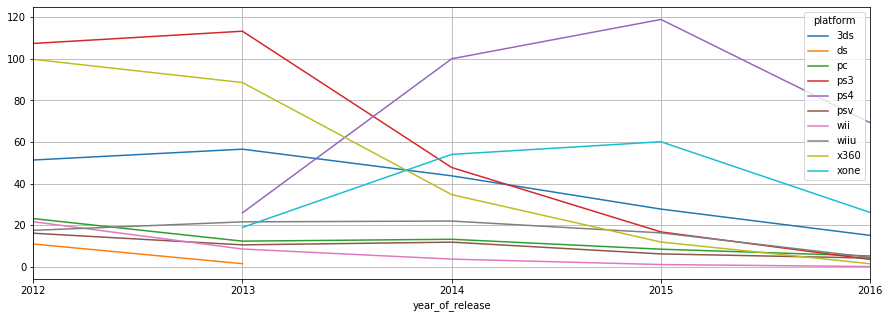

In [33]:
#построим график распределение продаж платформ по годам
data_actual.query('platform in @top_pl').pivot_table(index = 'year_of_release', columns = 'platform', values = 'union_sales', aggfunc = 'sum' ).plot(figsize = (15,5))
plt.grid(True)

**Вывод**

Потенциально лидируют три платформы: ps4, xone и 3ds. Однако, выпуски игр первых двух начали падать с 2015 года, у 3ds - это снижение с 2013 года. Платформа ds перестала выпускать новые релизы с 2013 года.

### График «ящик с усами» по глобальным продажам игр в разбивке по платформам

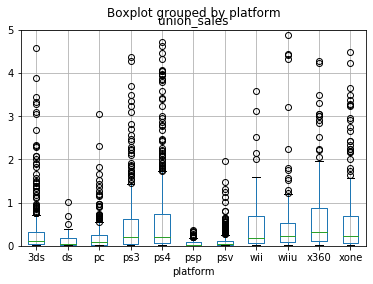

In [34]:
#Посмотрим на вбросы значений 
import warnings
warnings.filterwarnings('ignore')

data_actual.boxplot(column = 'union_sales', by = 'platform')
plt.ylim(0,5)
plt.show()

**Вывод**


Чем шире ящик, тем больше дисперсия и разброс данных - самые неоднородные продажи можно наблюдать у платформ ps4 и x360. Также у этих платформ много выбросов или нетипичных продаж. Можно предположить, что это игры-бестселлеры, которые принесли платформе максимальную прибль в расчете на одну игру. Например, 3DS имеет много таких игр, а у платформы xone, напротив, вся линейка игр стабильно хорошо продается. 

Напротив, у платформ ds и psp  - наименьшие ящики, что говорит о большом единообразии их продаж, а также - почти об отсутствии вбросов значений. Вероятно, и прогнозировать объем продаж по ним будет проще.

Медианы (зеленые линии внутри ящиков), которые показывают разницу между наиболее типичными продажами по платформам, также выше у ps4 и x360, то есть и продают эти платформы больше других. Далее за ними следуют ps3, xone и wiiu. 


### Как влияют на продажи отзывы пользователей и критиков

In [35]:
# для оценки возьмем одну из популярных платформ: x360
plt_x360 = data_actual[data_actual['platform'] == 'x360'].reset_index(drop=True)

plt_x360.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,union_sales
0,grand theft auto v,x360,2013-01-01,action,9.66,5.14,0.06,1.41,97.00,8.10,M,"2,013.00",16.27
1,call of duty: black ops ii,x360,2012-01-01,shooter,8.25,4.24,0.07,1.12,83.00,4.80,M,"2,012.00",13.68
2,call of duty: ghosts,x360,2013-01-01,shooter,6.73,2.56,0.04,0.91,73.00,2.60,M,"2,013.00",10.24
3,halo 4,x360,2012-01-01,shooter,6.65,2.28,0.04,0.74,87.00,7.00,M,"2,012.00",9.71
4,minecraft,x360,2013-01-01,misc,5.70,2.65,0.02,0.81,nan,nan,unknown,"2,013.00",9.18


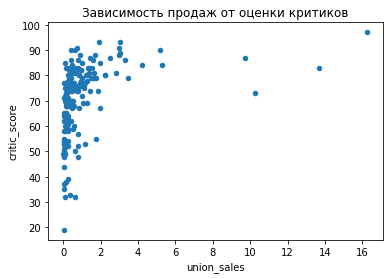

In [36]:
#построим диаграмму рассеяния для определения связи между отзывами критиков и продажами
plt_x360.plot(x='union_sales', y='critic_score', kind='scatter', title='Зависимость продаж от оценки критиков')

In [37]:
# посчитаем корреляцию зависимости продаж от отзывов критиков
plt_x360['union_sales'].corr(plt_x360['critic_score'])

0.36057348885073365

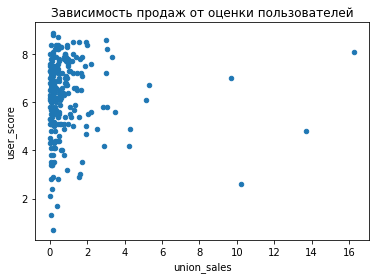

In [38]:
#построим диаграмму между отзывами пользователей и продажами

plt_x360.plot(x='union_sales', y='user_score', kind='scatter', title='Зависимость продаж от оценки пользователей')

In [39]:
# посчитаем корреляцию зависимости продаж от отзывов пользователей
plt_x360['union_sales'].corr(plt_x360['user_score'])

0.0061639786462133256

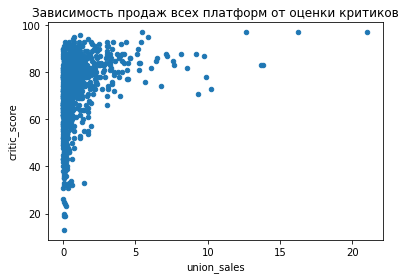

In [40]:
#построим диаграмму между отзывами критиков и продажами в целом по платформама
data_actual.plot(x='union_sales', y='critic_score', kind='scatter', title='Зависимость продаж всех платформ от оценки критиков')

In [41]:
# посчитаем корреляцию зависимости продаж от отзывов критиков
data_actual['union_sales'].corr(data_actual['critic_score'])

0.308196745920778

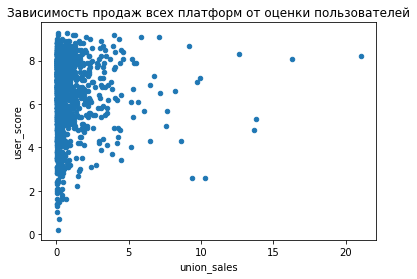

In [42]:
#построим диаграмму между отзывами пользователей и продажами

data_actual.plot(x='union_sales', y='user_score', kind='scatter', title='Зависимость продаж всех платформ от оценки пользователей')

In [43]:
# посчитаем корреляцию зависимости продаж от отзывов пользователей в целом по платформам
data_actual['union_sales'].corr(data_actual['user_score'])

0.004428817675493266

**Вывод**


И зависимость продаж от оценки критиков, и зависимость продаж от оценки пользователей имеют положительную корреляцию. Однако, эта зависимость сильнее в случае оценок критиков, их отзывы больше влияют на продажи, чем отзывы самих игроков.

В целом по платформам ситуация похожая - оценки критиков сильнее влияют на продажи, чем оценки пользователей. Однако, это влияние нельзя считать определяющим, так как зависимость достаточно слабая.

###  Распределение игр по жанрам

In [44]:
# общее распределение игр по жанрам
print(data_actual['genre'].value_counts())


action          1031
role-playing     370
adventure        302
sports           268
shooter          235
misc             192
racing           115
fighting         109
platform          85
simulation        80
strategy          71
puzzle            28
Name: genre, dtype: int64


In [45]:
# посчитаем, какие жанры приносят максимальную прибыль
data_genre = data_actual.groupby('genre').agg({'union_sales': 'sum'}).sort_values(by='union_sales')
display(data_genre)

,union_sales
genre,
puzzle,4.89
strategy,13.34
adventure,29.43
simulation,35.12
fighting,44.49
racing,53.50
platform,61.00
misc,85.04
sports,181.07


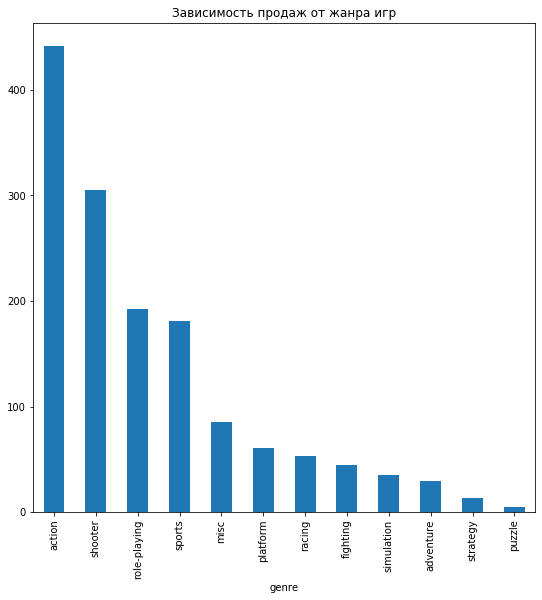

In [46]:
#Построим график с показателями общей суммы продаж для каждого жанра
data_actual.groupby('genre')['union_sales'].sum().sort_values(ascending=False).plot(kind='bar',
    title='Зависимость продаж от жанра игр', figsize=(9, 9))

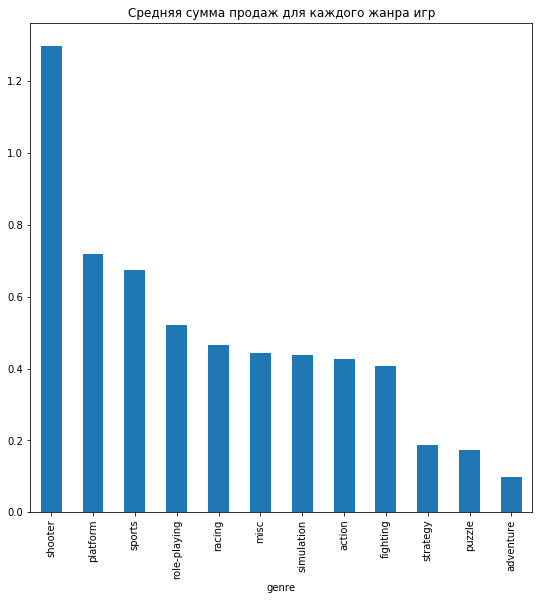

In [76]:
#Построим график с показателями средней суммы продаж для каждого жанра
data_actual.groupby('genre')['union_sales'].mean().sort_values(ascending=False).plot(kind='bar',
    title='Средняя сумма продаж для каждого жанра игр', figsize=(9, 9))

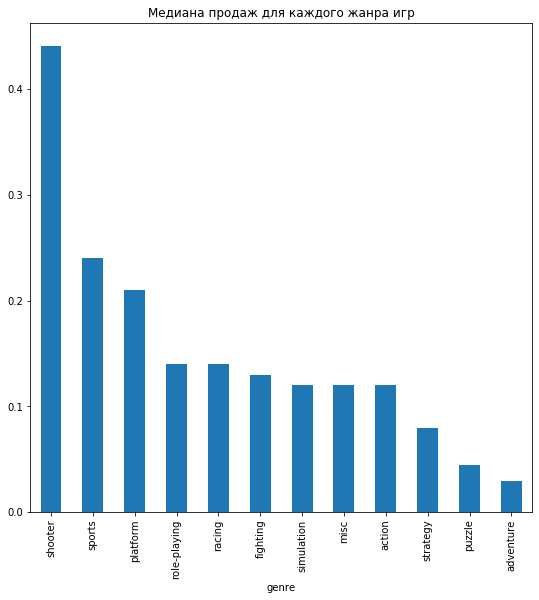

In [77]:
#Построим график с показателями медианы  продаж для каждого жанра
data_actual.groupby('genre')['union_sales'].median().sort_values(ascending=False).plot(kind='bar',
    title='Медиана продаж для каждого жанра игр', figsize=(9, 9))

In [95]:
#составим таблицу продаж по жанрам с учетом количества игры
data_genre_game = data_actual.groupby('genre').agg({'union_sales': 'sum', 'name': 'count'}).sort_values(by='union_sales')
#переименуем столбец
data_genre_game = data_genre_game.rename(columns={'name':'name_count'})
#добавим столбец со средним показателем дохода на одну игру
data_genre_game['sales_one_game'] =  data_genre_game['union_sales'] / data_genre_game['name_count']

display(data_genre_game.sort_values(by='sales_one_game'))

,union_sales,name_count,sales_one_game
genre,,,
adventure,29.43,302,0.10
puzzle,4.89,28,0.17
strategy,13.34,71,0.19
fighting,44.49,109,0.41
action,441.12,1031,0.43
simulation,35.12,80,0.44
misc,85.04,192,0.44
racing,53.50,115,0.47
role-playing,192.80,370,0.52


**Вывод**

Выделяются жанры с высокими и низкими продажами. У нас есть лидер по общему объему продаж - игры жанра "экшен" (action в переводе с англ. — «действие»), в котором делается упор на эксплуатацию физических возможностей игрока. Далее следуют шутер (стрелялка, англ. shooter), ролевые игры и спортивные соревнования. Стратегии и головоломки, напротив, занимают нижние строчки.

Однако, копий игр жанра "экшн" и больше, чем любых других игр: 1031 против 370 у ближайшего конкурента, ролевых игр. Расчет средней суммы продаж, а также продаж в пересчете на одну игру показали, что наиболее прибыльными являются игры жанра "шутер" или стрелялки - они в три раза прибыльнее, чем одна игра жанра экшн. Далее по прибыльности следуют игры жанра "платформер" (прыжки по платформам) и спортивные соревнования.

## Портрет пользователя каждого региона


###  Пользователь региона Северная Америка (NA)

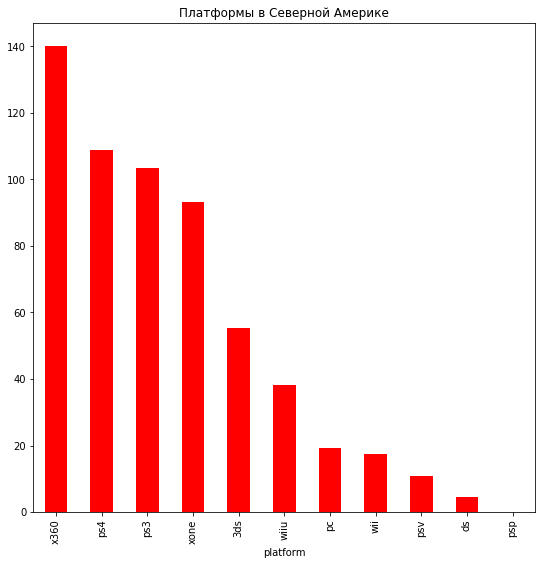

In [47]:
#Построим график с показателями сумм продаж для каждой платформы в Северной Америке 

data_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False).plot(kind='bar',
    title='Платформы в Северной Америке', color=('red'), figsize=(9, 9))

In [48]:
# Самые популярные платформы (топ-5) в Северной Америке
na_data = data_actual.groupby('platform').agg({'na_sales': 'sum'}).sort_values(by='na_sales').tail()
display(na_data)

,na_sales
platform,
3ds,55.31
xone,93.12
ps3,103.38
ps4,108.74
x360,140.05


In [49]:
# Самые популярные жанры (топ-5) в Северной Америке
na_data_genre = data_actual.groupby('genre').agg({'na_sales': 'sum'}).sort_values(by='na_sales').tail()
display(na_data_genre)

,na_sales
genre,
misc,38.19
role-playing,64.00
sports,81.53
shooter,144.77
action,177.84


In [50]:
#проверим, как влияет рейтинг ESRB на продажи в Северной Америке
data_rating = data_actual.groupby('rating').agg({'na_sales': 'sum'}).sort_values(by='na_sales')
display(data_rating)


,na_sales
rating,
T,66.02
E10+,75.70
unknown,103.31
E,114.37
M,231.57


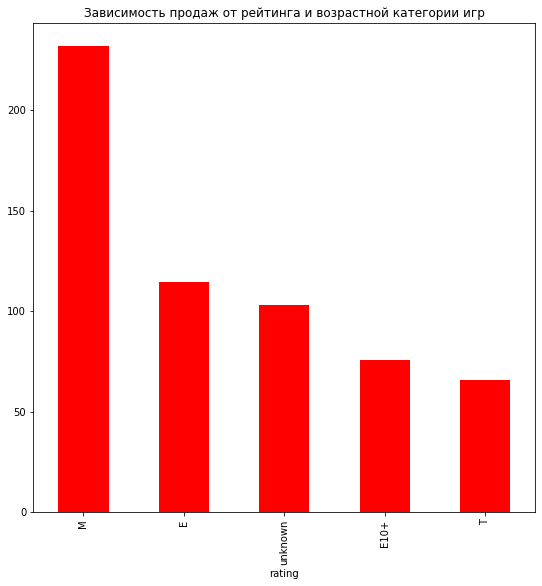

In [51]:
#Построим график с показателями сумм продаж для каждой категории
data_actual.groupby('rating')['na_sales'].sum().sort_values(ascending=False).plot(kind='bar',
    title='Зависимость продаж от рейтинга и возрастной категории игр', color=('red'), figsize=(9, 9))

**Вывод**

С большим отрывом от конкурентов в Северной Америке лидирует платформа x360 (140 против 108 млн). Также в этом регионе пользователи больше предпочитают жанры экшн, стрелялки и спортивные соревнования. 

Рейтинг от организации ESRB (англ. Entertainment Software Rating Board) влияет на объем продаж. Логично, что на первых строчках идут игры для взрослой категории («M» («Mature») — «От 17 лет») или «E» («Everyone») — «Для всех» - у них потенциально и больше игроков. Игры для детей («E10+» («Everyone 10 and older») — «Для всех старше 10 лет») и для подростков («T» («Teen») — «Подросткам 13—19 лет») замыкают рейтинг.



###  Пользователь региона Европа (EU)

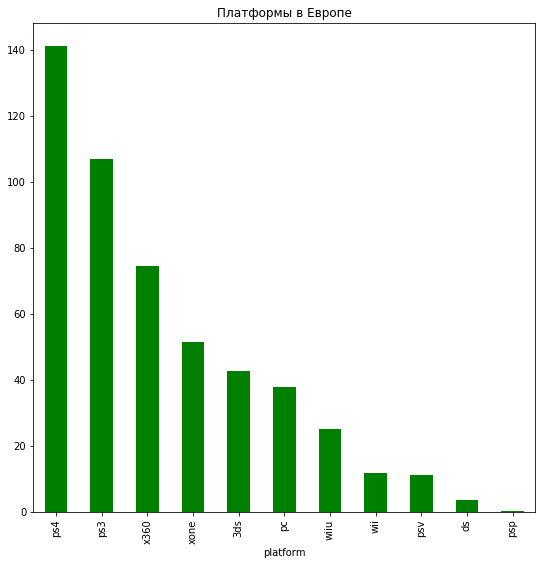

In [52]:
#Построим график с показателями сумм продаж для каждой платформы в Европе

data_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).plot(kind='bar',
    title='Платформы в Европе', color=('green'), figsize=(9, 9))

In [53]:
# Самые популярные платформы (топ-5) в Европе
eu_data = data_actual.groupby('platform').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales').tail()
display(eu_data)

,eu_sales
platform,
3ds,42.64
xone,51.59
x360,74.52
ps3,106.86
ps4,141.09


In [54]:
# Самые популярные жанры (топ-5) в Европе
eu_data_genre = data_actual.groupby('genre').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales').tail()
display(eu_data_genre)

,eu_sales
genre,
racing,27.29
role-playing,48.53
sports,69.09
shooter,113.47
action,159.34


In [55]:
#посмотрим, как влияет рейтинг ESRB на продажи в Европе
data_rating_eu = data_actual.groupby('rating').agg({'eu_sales': 'sum'}).sort_values(by='eu_sales')
display(data_rating_eu)


,eu_sales
rating,
T,52.96
E10+,55.37
unknown,91.50
E,113.03
M,193.96


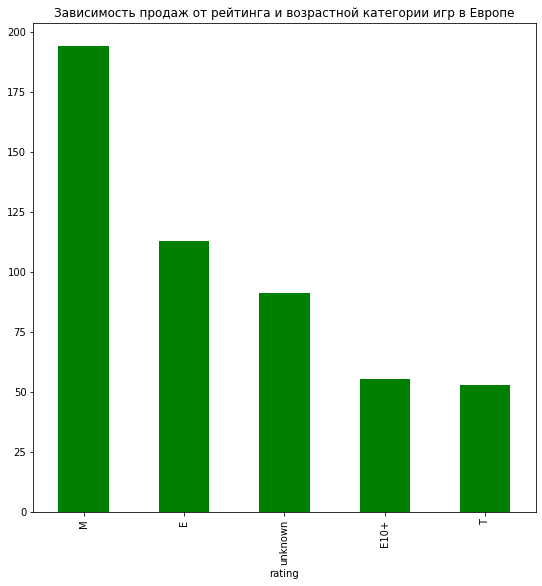

In [56]:
#Построим график с показателями сумм продаж для каждой категории
data_actual.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).plot(kind='bar',
    title='Зависимость продаж от рейтинга и возрастной категории игр в Европе', color=('green'), figsize=(9, 9))

**Вывод**

В Европе, в отличие от Северной Америки, лидируют платформы ps4 и ps3, а североамериканский лидер  - платформа x360 - находится лишь на третьей позиции. Также в этом регионе, как и в Северной Америке, пользователи больше предпочитают жанры экшн, стрелялки и спортивные соревнования. 

Аналогично Северной Америке в Европе и распределение по рейтингу ESRB: на первых позициях по продажам идут игры для взрослой категории («M» («Mature») — «От 17 лет») или «E» («Everyone») — «Для всех»). Игры для детей («E10+» («Everyone 10 and older») — «Для всех старше 10 лет») и для подростков («T» («Teen») — «Подросткам 13—19 лет») замыкают рейтинг.


###  Пользователь региона Япония (JP)

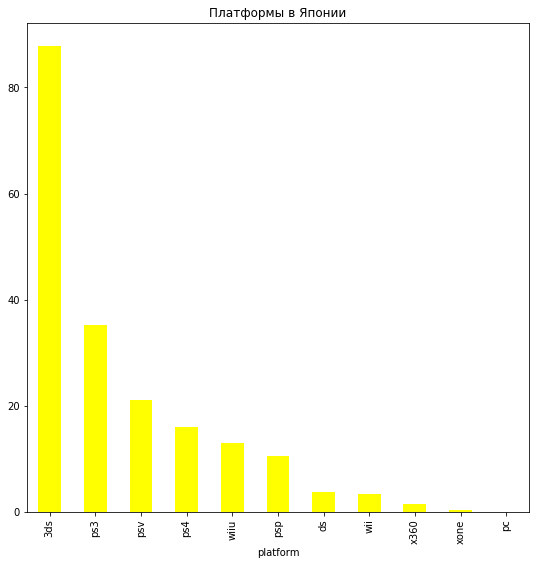

In [57]:
#Построим график с показателями сумм продаж для каждой платформы в Японии

data_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).plot(kind='bar',
    title='Платформы в Японии', color=('yellow'), figsize=(9, 9))

In [58]:
# Самые популярные платформы (топ-5) в Японии
jp_data = data_actual.groupby('platform').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales').tail()
display(jp_data)

,jp_sales
platform,
wiiu,13.01
ps4,15.96
psv,21.04
ps3,35.29
3ds,87.79


In [59]:
# Самые популярные жанры (топ-5) в Японии
jp_data_genre = data_actual.groupby('genre').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales').tail()
display(jp_data_genre)

,jp_sales
genre,
fighting,9.44
simulation,10.41
misc,12.86
action,52.80
role-playing,65.44


In [60]:
#посмотрим, как влияет рейтинг ESRB на продажи в Японии
data_rating_jp = data_actual.groupby('rating').agg({'jp_sales': 'sum'}).sort_values(by='jp_sales')
display(data_rating_jp)

,jp_sales
rating,
E10+,8.19
M,21.20
T,26.02
E,28.33
unknown,108.84


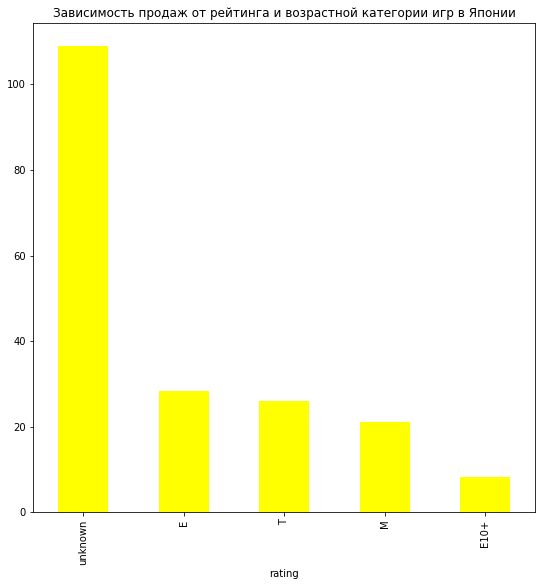

In [61]:
#Построим график с показателями сумм продаж для каждой категории
data_actual.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).plot(kind='bar',
    title='Зависимость продаж от рейтинга и возрастной категории игр в Японии', color=('yellow'), figsize=(9, 9))

**Вывод**

Показатели пользователей компьютерных игр в Японии сильно отличаются от Европы и Северной Америки. Так, здесь сменилась лидирующая тройка платформ (3ds, ps3, psv). Например, североамериканский лидер  - платформа x360 - занимает очень скромную 9 позицию. 

Также в этом регионе сменился и лидеры жанров компьютерных игр - ролевые игры японцы предпочитают больше, чем жанр экшн, а стрелялки и спортивные соревнования, популярные в западном мире, здесь даже не попали в топ-5.

Сложно что-то сказать о ESRB, так как лидирующая категория неизвестна. Примечательно, что игры для подростков («T» («Teen») — «Подросткам 13—19 лет») - здесь обгоняют игры для взрослой категории («M» («Mature») — «От 17 лет») и для детей («E10+» («Everyone 10 and older») — «Для всех старше 10 лет»).

При этом в Японии действуют свои системы возрастных классификаций для игр (Computer Entertainment Rating Organization (CERO) и Ethics Organization of Computer Software (EOCS). Поэтому в данном случае, ESRB нельзя считать показательным для этого региона.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC

**Нулевая гипотеза:** средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

**Альтернативная гипотеза:** средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.

***Примечание: H₀ всегда формулируется так, чтобы использовать знак равенства. Другими словами, чтобы все значения, полученные эмпирически, не были экстремальными, а лежали там, где ожидаем их найти. Например, если мы исследуем, не увеличилась ли величина, то нулевая гипотеза будет звучать: «нет, не увеличилась». Если выясняем, есть ли разница между совокупностями, то нулевая гипотеза будет такая: «нет, разницы нет, то есть исследуемые параметры равны».***

In [62]:
#создадим таблицу для платформы Xbox One

xbox_one = data_actual[data_actual['platform'] == 'xone'].reset_index(drop=True)

xbox_one.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,union_sales
0,call of duty: black ops 3,xone,2015-01-01,shooter,4.59,2.11,0.01,0.68,nan,nan,unknown,"2,015.00",7.39
1,grand theft auto v,xone,2014-01-01,action,2.81,2.19,0.00,0.47,97.00,7.90,M,"2,014.00",5.47
2,call of duty: advanced warfare,xone,2014-01-01,shooter,3.22,1.55,0.01,0.48,81.00,5.40,M,"2,014.00",5.26
3,halo 5: guardians,xone,2015-01-01,shooter,2.78,1.27,0.03,0.41,84.00,6.40,T,"2,015.00",4.49
4,fallout 4,xone,2015-01-01,role-playing,2.51,1.32,0.01,0.38,88.00,6.20,M,"2,015.00",4.22


In [63]:
#соберем значения пользовательского рейтинга для платформы Xbox One и избавимся от пропусков
xbox_one_user_score = xbox_one['user_score'].dropna()
xbox_one_user_score.isna().sum()

0

In [64]:
#создадим таблицу для платформы PC

pc_platform = data_actual[data_actual['platform'] == 'pc'].reset_index(drop=True)

pc_platform.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,union_sales
0,diablo iii,pc,2012-01-01,role-playing,2.44,2.16,0.00,0.54,88.00,4.00,M,"2,012.00",5.14
1,the sims 4,pc,2014-01-01,simulation,1.00,1.82,0.00,0.23,70.00,3.90,T,"2,014.00",3.05
2,guild wars 2,pc,2012-01-01,action,0.96,1.07,0.00,0.27,90.00,7.90,T,"2,012.00",2.30
3,world of warcraft: mists of pandaria,pc,2012-01-01,role-playing,0.84,0.76,0.00,0.22,82.00,4.80,T,"2,012.00",1.82
4,starcraft ii: heart of the swarm,pc,2013-01-01,strategy,0.83,0.66,0.00,0.18,86.00,7.90,T,"2,013.00",1.67


In [65]:
#соберем значения пользовательского рейтинга для платформы PC и избавимся от пропусков

pc_platform_user_score = pc_platform['user_score'].dropna()
pc_platform_user_score.isna().sum()

0

In [66]:
alpha = 0.05
results = st.ttest_ind(xbox_one_user_score, pc_platform_user_score)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


In [67]:
#проверим полученные данные, рассчитаем среднее пользовательского рейтинга для каждой платформы 
print('Средний рейтинг пользователей платформы Xbox One равен: {:.1f}'.format(xbox_one_user_score.mean()))
print('Средний рейтинг пользователей платформы PC равен: {:.1f}'.format(pc_platform_user_score.mean()))

Средний рейтинг пользователей платформы Xbox One равен: 6.5
Средний рейтинг пользователей платформы PC равен: 6.4


In [68]:
#проверим полученные данные, рассчитаем среднее пользовательского рейтинга для каждой платформы
print('Медиана рейтинга пользователей платформы Xbox One равна: {:.1f}'.format(xbox_one_user_score.median()))
print('Медиана рейтинга пользователей платформы PC равна: {:.1f}'.format(pc_platform_user_score.median()))

Медиана рейтинга пользователей платформы Xbox One равна: 6.8
Медиана рейтинга пользователей платформы PC равна: 6.8


**Вывод**

Нам не удалось опровергнуть нулевую гипотезу - средние пользовательские рейтинги платформ Xbox One и PC одинаковые - то есть рейтинги и правда, одинаковые. Мы это также доказали в ходе проверки, вычислив по данным среднее и медиану.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»)

**Нулевая гипотеза:** средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые;

**Альтернативная гипотеза:** средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [69]:
#создадим таблицу для жанра Action

action_data = data_actual[data_actual['genre'] == 'action'].reset_index(drop=True)

action_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,union_sales
0,grand theft auto v,ps3,2013-01-01,action,7.02,9.09,0.98,3.96,97.00,8.20,M,"2,013.00",21.05
1,grand theft auto v,x360,2013-01-01,action,9.66,5.14,0.06,1.41,97.00,8.10,M,"2,013.00",16.27
2,grand theft auto v,ps4,2014-01-01,action,3.96,6.31,0.38,1.97,97.00,8.30,M,"2,014.00",12.62
3,fifa soccer 13,ps3,2012-01-01,action,1.06,5.01,0.13,1.97,88.00,6.60,E,"2,012.00",8.17
4,assassin's creed iii,ps3,2012-01-01,action,2.64,2.52,0.16,1.12,85.00,6.90,M,"2,012.00",6.44


In [70]:
#соберем значения пользовательского рейтинга для жанра Action и избавимся от пропусков
action_data_user_score = action_data['user_score'].dropna()
action_data_user_score.isna().sum()

0

In [71]:
#создадим таблицу для жанра Sports

sports_data = data_actual[data_actual['genre'] == 'sports'].reset_index(drop=True)

sports_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,union_sales
0,fifa 16,ps4,2015-01-01,sports,1.12,6.12,0.06,1.28,82.00,4.30,E,"2,015.00",8.58
1,fifa 17,ps4,2016-01-01,sports,0.66,5.75,0.08,1.11,85.00,5.00,E,"2,016.00",7.60
2,fifa 14,ps3,2013-01-01,sports,0.78,4.24,0.07,1.37,86.00,4.30,E,"2,013.00",6.46
3,fifa 15,ps4,2014-01-01,sports,0.80,4.33,0.05,0.90,82.00,5.70,E,"2,014.00",6.08
4,fifa 15,ps3,2014-01-01,sports,0.58,3.02,0.04,0.64,nan,4.50,E,"2,014.00",4.28


In [72]:
#соберем значения пользовательского рейтинга для жанра Sports и избавимся от пропусков
sports_data_user_score = sports_data['user_score'].dropna()
sports_data_user_score.isna().sum()

0

In [73]:
alpha = 0.05
results = st.ttest_ind(action_data_user_score, sports_data_user_score)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  3.7163089460934874e-26
Отвергаем нулевую гипотезу


In [74]:
#проверим полученные данные, расчитаем среднее оценок пользователей для каждого жанра компьютерной игры
print('Средний рейтинг пользователей для жанра action равен: {:.1f}'.format(action_data_user_score.mean()))
print('Средний рейтинг пользователей для жанра sports равен: {:.1f}'.format(sports_data_user_score.mean()))

Средний рейтинг пользователей для жанра action равен: 6.8
Средний рейтинг пользователей для жанра sports равен: 5.5


In [75]:
#проверим полученные данные, расчитаем медиану оценок пользователей для каждого жанра компьютерной игры
print('Медиана рейтинга пользователей для жанра action равна: {:.1f}'.format(action_data_user_score.median()))
print('Медиана рейтинга пользователей для жанра sports равена: {:.1f}'.format(sports_data_user_score.median()))

Медиана рейтинга пользователей для жанра action равна: 7.1
Медиана рейтинга пользователей для жанра sports равена: 5.7


**Вывод**

Мы опровергли нулевую гипотезу - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые - то есть оне не одинаковые. Мы это также доказали в ходе проверки, вычислив по данным среднее и медиану - выше пользователи оценивают игры жанра Action.

## Общий вывод

1. В мире по объемам продаж лидируют три платформы: ps4, xone и 3ds. Однако, нужно учитывать регион, в котором планируются продажи. Так, в Северной Америке лидирует платформа x360, в Европе - платформы ps4 и ps3, а в Японии - 3ds, ps3, psv. 


2. Самые неоднородные продажи можно наблюдать у платформ ps4 и x360. Также у этих платформ много выбросов или нетипичных продаж. Можно предположить, что выбросы - это какие-то популярные игры, игры - бестселлеры. Например, у платформы 3DS маленький ящик и много выбросов, то есть большАя часть объема продаж делается за счет этих выбросов. В то же время у XOne ситуация иная: большой бокс, длинный ус и мало выбросов. Это свидетельствует о том, что на XOne покупают самые разные игры, причем, в немалом количестве. У платформ ds и psp наибольшее единообразие продаж, а также почти отсутствуют вбросовы. Вероятно, и прогнозировать объем продаж по ним будет проще. 


3. Объем продаж зависит от жанра игры. Жанр, которые приносят наибольшую прибыль, - "экшен" (action в переводе с англ. — «действие»). Далее следуют шутер (стрелялка, англ. shooter), ролевые игры и спортивные соревнования. Стратегии и головоломки, напротив, занимают нижние строчки. Однако, копий игр жанра "экшн" и больше, чем любых других игр: 1031 против 370 у ближайшего конкурента, ролевых игр. Расчет средней суммы продаж, а также продаж в пересчете на одну игру показали, что наиболее прибыльными являются игры жанра "шутер" или стрелялки - они в три раза прибыльнее, чем одна игра жанра "экшн". Далее по прибыльности следуют игры жанра "платформер" (прыжки по платформам) и спортивные соревнования.


4. При этом следует учитывать, что популярность жанров может различаться в разных регионах мира. Например, в Японии ролевые игры являются абсолютным лидером, а стрелялки и спортивные соревнования, популярные в западном мире, здесь даже не попали в топ-5. А также разные жанры (например, жанров Action и Sports) могут иметь разные оценки пользователей. 


5. Выяснилось, что зависимость продаж от оценки критиков, и зависимость продаж от оценки пользователей имеют положительную корреляцию. Эта зависимость сильнее в случае оценок критиков, их отзывы больше влияют на продажи, чем отзывы самих игроков. Однако, это влияние нельзя считать определяющим, так как зависимость достаточно слабая.


6. Также следует учитывать рейтинг от организации ESRB (англ. Entertainment Software Rating Board), который влияет на объем продаж игр. На первых строчках в Северной Америке и Европе идут игры для взрослой категории («M» («Mature») — «От 17 лет») или «E» («Everyone») — «Для всех». Игры для детей («E10+» («Everyone 10 and older») — «Для всех старше 10 лет») и для подростков («T» («Teen») — «Подросткам 13—19 лет») им заметно уступают по продажам. Исключение здесь - Япония, где игры для подростков («T» («Teen») — «Подросткам 13—19 лет») обгоняют игры для взрослой категории («M» («Mature») — «От 17 лет») и для детей («E10+» («Everyone 10 and older») — «Для всех старше 10 лет»). Однако, стоить помнить, что в Японии существуют свои организации, которые присваивают возрастной рейтинг игр и при планировании рекламных кампаний и кампаний по продвижению следует ориентироваться на них (это Computer Entertainment Rating Organization (CERO) и Ethics Organization of Computer Software (EOCS).


7. В ходе исследования мы установили, пик суммарных продаж приходится всех исследуемых платформ пришелся на 2001-2010 годы - тогда же, было и наибольшее число выпущенных компьютерных игр. В среднем жизненный цикл одной платформы составляет около 9 лет, что следует учитывать, например, при долгосрочном планировании продаж и рекламных кампаний. 

